[Exercise 5](https://youtu.be/jGg_1h0qzaM?t=5372)

Looping - conditional node back to itself

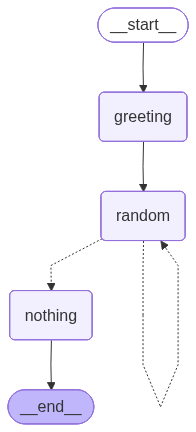

In [14]:
from typing import TypedDict, List 

from IPython.display import Image, display
from langgraph.graph import StateGraph, END, START
import random



class State(TypedDict):
    name: str
    number: List[int]
    counter: int


def greeting_node(state: State) -> State:
    state["name"] = f"Hi there, {state["name"]}"
    state["counter"] = 0
    return state


def random_node(state: State) -> State:
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1
    return state


def should_continue(state: State) -> str:
    print(f"In the loop: {state['counter']}")
    if state["counter"] < 5:
        return "random"
    return "nothing"


def nothing_node(state: State) -> State:
    return state

graph = StateGraph(State)
graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_node("nothing", nothing_node)
graph.add_edge(START, "greeting")
graph.add_edge("greeting", "random")
graph.add_conditional_edges(
    "random", 
    should_continue,
    {
        "random": "random",
        "nothing": "nothing"
    })
graph.add_edge("nothing", END)

worflow = graph.compile()
display(Image(worflow.get_graph().draw_mermaid_png()))

In [13]:
worflow.invoke({"name": "Alice", "number": [], "counter": 0})

In the loop: 1
In the loop: 2
In the loop: 3
In the loop: 4
In the loop: 5


{'name': 'Hi there, Alice', 'number': [9, 8, 3, 10, 2], 'counter': 5}